<font size="6">Практическая работа №9</font>


Подключение библиотек:

In [15]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

<font size="4">Задание 1. Загрузка данных.</font>


In [16]:
importedData = pd.read_csv("insurance.csv")

Вывод данных:

In [17]:
importedData.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Вывод уникальных регионов:

In [18]:
regions = importedData['region'].unique()
importedData['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<font size="4">Задание 2. Выполнение однофакторного ANOVA теста.</font>

In [19]:
data = importedData.drop(columns=['age', 'sex', 'children', 'smoker', 'charges'])
data.head(5)

,bmi,region
0,27.900,southwest
1,33.770,southeast
2,33.000,southeast
3,22.705,northwest
4,28.880,northwest


In [20]:
groups = data.groupby("region").groups

In [21]:
southwest = data['bmi'][groups["southwest"]]
southeast = data['bmi'][groups["southeast"]]
northwest = data['bmi'][groups["northwest"]]
northeast = data['bmi'][groups["northeast"]]

In [22]:
stats.f_oneway(southwest, southeast, northwest, northeast)


F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)

<font siz="3">Поскольку p < 0.05 можно сделать вывод, что нулевую теорию (гласящую о том, что средние групп равны) можно отбросить, соответственно принимается альтернативная теория, которая говорит о различии средних. Отсюда следует вывод, что фактор 'region' имеет статистически значимое влияние на показатель 'bmi' данных выборок.</font>

<font size="4">Задание 3. Выполнение однофакторного ANOVA теста при помощи библиотеки statsmodels.</font>

In [23]:
model = ols('bmi ~ region', data=data).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


<font size="3">Вывод тот же самый, что и в предыдущем задании. р < 0.05...</font>

<font size="4">Задание 4. С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони.</font>

In [24]:
region_pairs = []

for region1 in range(3):
    for region2 in range (region1+1, 4):
        region_pairs.append((regions[region1], regions[region2]))

In [25]:
for region1, region2 in region_pairs:
    print(region1, region2)
    print(stats.ttest_ind(data['bmi'].iloc[groups[region1]], data['bmi'].iloc[groups[region2]]))

southwest southeast
Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)
southwest northwest
Ttest_indResult(statistic=3.2844171500398582, pvalue=0.001076958496307695)
southwest northeast
Ttest_indResult(statistic=3.1169000930045923, pvalue=0.0019086161671573072)
southeast northwest
Ttest_indResult(statistic=9.25649013552548, pvalue=2.643571405230106e-19)
southeast northeast
Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17)
northwest northeast
Ttest_indResult(statistic=0.060307727183293185, pvalue=0.951929170821864)


α/m = 0.0083...

pvalue=5.4374009639680636e-09   < 0.008

pvalue=0.001076958496307695     < 0.008

pvalue=0.0019086161671573072    < 0.008

pvalue=2.643571405230106e-19    < 0.008

pvalue=1.186014937424813e-17    < 0.008

pvalue=0.951929170821864        > 0.008

<font size="3">Из результатов данного теста можно сделать выводы, что все пары групп кроме northwest-northeast имеют статистически значимые различия.</font>

<font size="4">Задание 5. Выполнить пост-хок тесты Тьюки и построить график.</font>

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


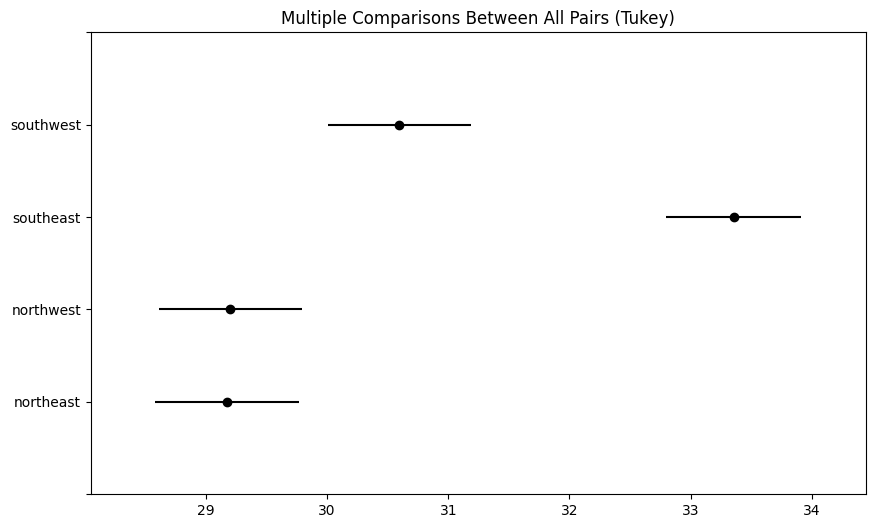

In [26]:
tukey = pairwise_tukeyhsd(endog=data['bmi'], groups=data['region'], alpha=0.05)
tukey.plot_simultaneous()
tukey.summary()


<font size="3">Как и в предыдущем тесте, все группы показывают различие в BMI, кроме пары northeast - northwest. График это подтверждает, доверительные интервалы этих групп перекрываются.</font>

<font size="4">Задание 6. Выполнить двухфакторный ANOVA тест, чтобы проверить влияние
региона и пола на индекс массы тела (BMI), используя функцию anova_lm() из библиотеки statsmodels.</font>

In [29]:
data = importedData.drop(columns=['age', 'children', 'smoker', 'charges'])
data

,sex,bmi,region
0,female,27.900,southwest
1,male,33.770,southeast
2,male,33.000,southeast
3,male,22.705,northwest
4,male,28.880,northwest
...,...,...,...
1333,male,30.970,northwest
1334,female,31.920,northeast
1335,female,36.850,southeast
1336,female,25.800,southwest


In [31]:
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(region),4034.975135,3.0,39.398134,2.163195e-24
C(sex),86.007035,1.0,2.519359,1.126940e-01
C(region):C(sex),174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN


<font size="3">P-значения всех факторов меньше 0.05, это значит что все факторы оказывают статистически значимое влияние на значение BMI.</font>

<font size="4">Задание 7. Выполнить пост-хок тесты Тьюки и построить график.</font>

In [33]:
data['combinaiton'] = data['region'] + " / " + data['sex']
data['combinaiton']

0       southwest / female
1         southeast / male
2         southeast / male
3         northwest / male
4         northwest / male
               ...        
1333      northwest / male
1334    northeast / female
1335    southeast / female
1336    southwest / female
1337    northwest / female
Name: combinaiton, Length: 1338, dtype: object

group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9998,-2.2706,1.6711,False
northeast / female,northwest / female,-0.0464,1.0,-2.0142,1.9215,False
northeast / female,northwest / male,-0.2042,1.0,-2.1811,1.7728,False
northeast / female,southeast / female,3.3469,0.0,1.41,5.2839,True
northeast / female,southeast / male,4.6657,0.0,2.7634,6.568,True
northeast / female,southwest / female,0.7362,0.9497,-1.2377,2.71,False
northeast / female,southwest / male,1.8051,0.1007,-0.1657,3.776,False
northeast / male,northwest / female,0.2534,0.9999,-1.7083,2.2152,False
northeast / male,northwest / male,0.0956,1.0,-1.8752,2.0665,False
northeast / male,southeast / female,3.6467,0.0,1.7159,5.5775,True


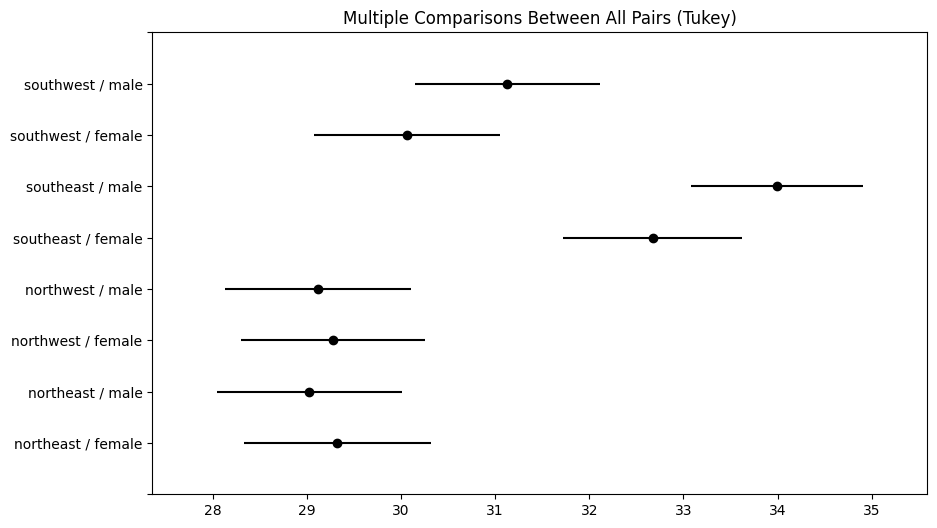

In [34]:
tukey = pairwise_tukeyhsd(endog=data['bmi'], groups=data['combinaiton'], alpha=0.05)
tukey.plot_simultaneous()
tukey.summary()

<font size="3">Из выполненного теста можно сделать выводы, что хоть и многие группы имеют статистически важные различия (о чем свидетельствует значение 'true' в колонке 'reject'), не все так однозначно, и к примеру у групп northwest и southwest есть пересекающиеся довирительные интервалы в многих подгруппах, что может говорить и о близости их значений. К слову группы из северных регионов очень похожи, и имеют больше общего, чем группы из южных, где southeast отличается от southwest больше, чем последний отличается от северных регионов. </font>